<a href="https://colab.research.google.com/github/ptran1203/photorealistic_style_transfer/blob/master/WCT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive, output
data_loaded = False
drive.mount('/content/drive')
BASE_DIR = "/content/drive/My Drive/Style_Transfer"
!rm -rf '/content/photorealistic_style_transfer'
!git clone https://github.com/ptran1203/photorealistic_style_transfer

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cloning into 'photorealistic_style_transfer'...
remote: Enumerating objects: 229, done.
remote: Counting objects: 100% (229/229), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 705 (delta 60), reused 201 (delta 32), pack-reused 476
Receiving objects: 100% (705/705), 53.21 MiB | 51.26 MiB/s, done.
Resolving deltas: 100% (347/347), done.


In [ ]:
cd photorealistic_style_transfer

/content/photorealistic_style_transfer


In [ ]:
from model import WCT2
from dataloader import DataGenerator
from utils import http_get_img, preprocess, get_local_img
from ops import WhiteningAndColoring, get_predict_function, gram_matrix, TfReduceSum
import tensorflow.keras.backend as K
import tensorflow as tf
from google.colab.patches import cv2_imshow

class _WCT2(WCT2):
    pass

wct = _WCT2(BASE_DIR, rst=None, lr=1e-4, show_interval=10,
            gram_loss_weight=1.0)
data_gen = DataGenerator(BASE_DIR, 8, 256, max_size=1500,
                        normalize=True)


In [ ]:
wct.load_weight()
wct.train(data_gen, 500)

20
load data in  0:00:00.048210
Transfer in  0:00:00.983837


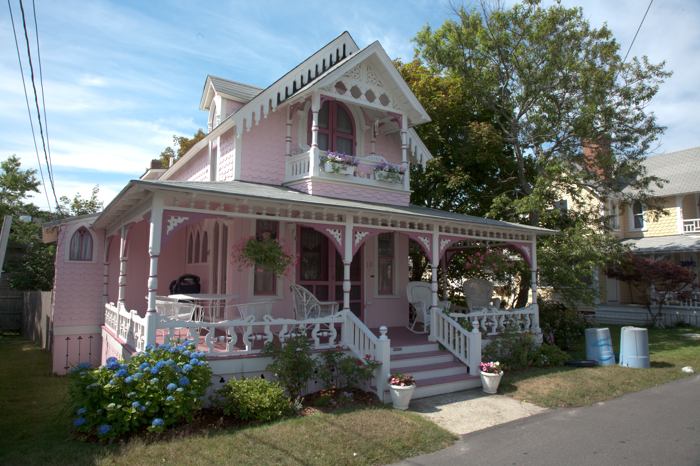

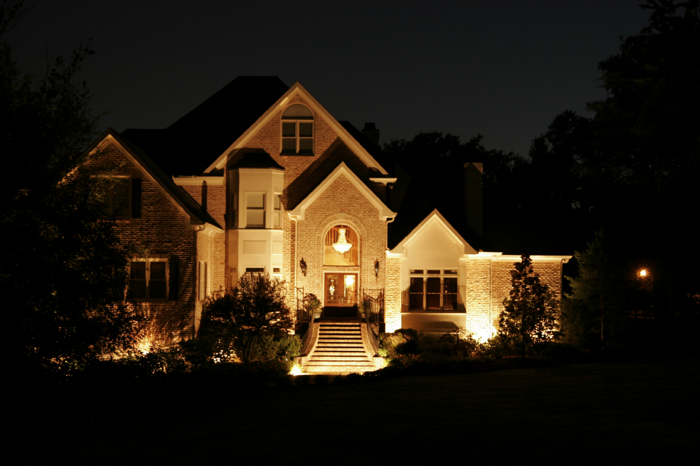

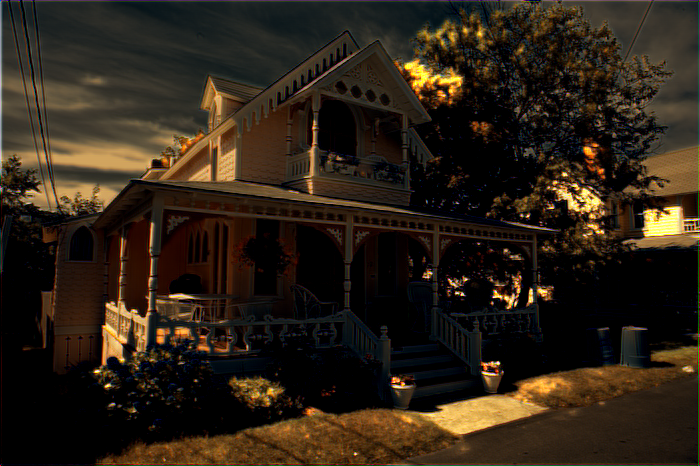

In [ ]:
import datetime
import numpy as np

rst=None
test_id = np.random.randint(1, 60)
test_id=20
print(test_id)

start = datetime.datetime.now()
content = get_local_img("examples/input/in{}.png".format(test_id),rst,True,True)
style = get_local_img("examples/style/tar{}.png".format(test_id),rst,True,True)

# content = http_get_img(
#     'https://github.com/clovaai/WCT2/blob/master/examples/content/in00.png?raw=true',
#     None,True,True
# )

# style = http_get_img(
#     'https://github.com/clovaai/WCT2/blob/master/examples/style/in00.png?raw=true',
#     None,True,True
# )

print("load data in ", (datetime.datetime.now() - start))

start = datetime.datetime.now()
new_img = wct.transfer(content, style, 1.0)
print("Transfer in ", (datetime.datetime.now() - start))

data_gen.show_imgs(content[0])
data_gen.show_imgs(style[0])
data_gen.show_imgs(new_img[0])
